# Flight Price Prediction

## Motivation of this Project

In this project, given a dataset of flights within India we wish to predict the prices based on some factors. The Machine Learning algorithm used in this project will be **Linear Regression**.

**Basic idea behind Linear Regression:** A statistical approach to model the relationship between predictor variables and target variables. In this case since we are going to be predicting a single target variable our Linear Regression model will be classied as **Simple Linear Regression**.

## Approach

To solve this problem the approach will be as follows:
1. Importing the necessary Libraries
2. Importing the Dataset
3. Exploratory Data Analysis
4. Correlations
6. Train - Test Split
7. Feature Engineering
8. Linear Regression Using Statsmodel
9. Linear Regression Using Scikit Learn
10. Model Summary

## Importing the necessary Libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import f_oneway
from scipy import stats
import scipy
from matplotlib.pyplot import figure

## Importing the Dataset

In [29]:
df = pd.read_csv('Flight_Price_Prediction.csv')

In [30]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [31]:
df.tail()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [32]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

## Exploratory Data Analysis

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [34]:
df.describe

<bound method NDFrame.describe of         Unnamed: 0   airline   flight source_city departure_time stops  \
0                0  SpiceJet  SG-8709       Delhi        Evening  zero   
1                1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2                2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3                3   Vistara   UK-995       Delhi        Morning  zero   
4                4   Vistara   UK-963       Delhi        Morning  zero   
...            ...       ...      ...         ...            ...   ...   
300148      300148   Vistara   UK-822     Chennai        Morning   one   
300149      300149   Vistara   UK-826     Chennai      Afternoon   one   
300150      300150   Vistara   UK-832     Chennai  Early_Morning   one   
300151      300151   Vistara   UK-828     Chennai  Early_Morning   one   
300152      300152   Vistara   UK-822     Chennai        Morning   one   

         arrival_time destination_city     class  duration  days_left  price 

In [35]:
df.isnull().values.any()

False

### Some Questions

##### Does the Price vary with Airlines for the same source city to destination city?

To explore this question, group the airline, source city and destination and calculate the mean values of each group and we could visualise this using a bar plot

In [36]:
grouped = df.groupby(['airline', 'source_city', 'destination_city'])['price'].mean().reset_index()
grouped

,airline,source_city,destination_city,price
0,AirAsia,Bangalore,Chennai,2073.043478
1,AirAsia,Bangalore,Delhi,4807.092426
2,AirAsia,Bangalore,Hyderabad,2931.494792
3,AirAsia,Bangalore,Kolkata,4443.468160
4,AirAsia,Bangalore,Mumbai,3342.385350
...,...,...,...,...
172,Vistara,Mumbai,Bangalore,35029.880315
173,Vistara,Mumbai,Chennai,32181.946251
174,Vistara,Mumbai,Delhi,26402.695114
175,Vistara,Mumbai,Hyderabad,29497.578017


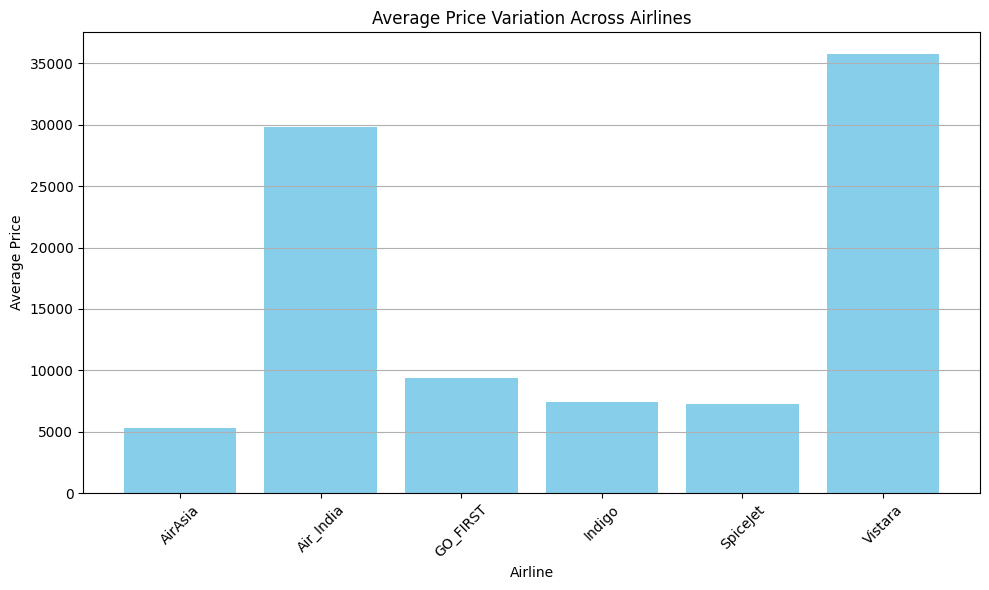

In [37]:
plt.figure(figsize=(10, 6))
plt.bar(grouped['airline'], grouped['price'], color='skyblue')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.title('Average Price Variation Across Airlines')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

As seen above there is significant variance across different airlines for the same travels with **Vistara** being the most expensive and **AirAsia** being the cheapest relatively.

##### How does days left before departure affect ticket prices?

In [38]:
grouped_dl = df.groupby(['days_left'])['price'].mean().reset_index()
grouped_dl = grouped_dl[(grouped_dl['days_left']==1) | (grouped_dl['days_left']==2)]
grouped_dl

,days_left,price
0,1,21591.867151
1,2,30211.299801


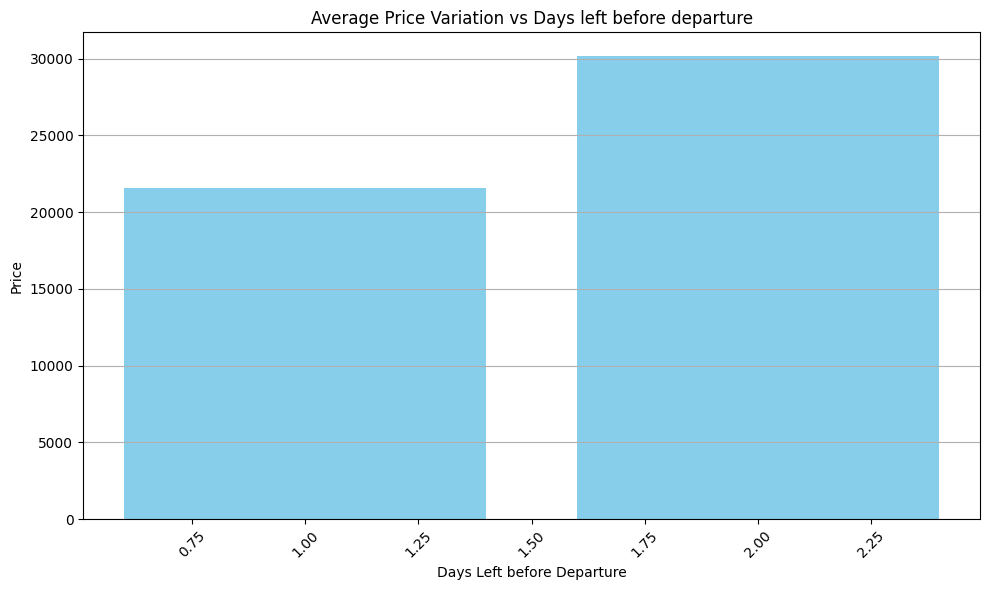

In [39]:
plt.figure(figsize=(10, 6))
plt.bar(grouped_dl['days_left'], grouped_dl['price'], color='skyblue')
plt.xlabel('Days Left before Departure')
plt.ylabel('Price')
plt.title('Average Price Variation vs Days left before departure')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

As seen in the plot above prices generally do go higher overall as the number of days decreases.

#### Does the price change based on Departure time? 

In [40]:
grouped_dep = df.groupby(['departure_time'])['price'].mean().reset_index()
grouped_dep

,departure_time,price
0,Afternoon,18179.203331
1,Early_Morning,20370.676718
2,Evening,21232.361894
3,Late_Night,9295.299387
4,Morning,21630.760254
5,Night,23062.146808


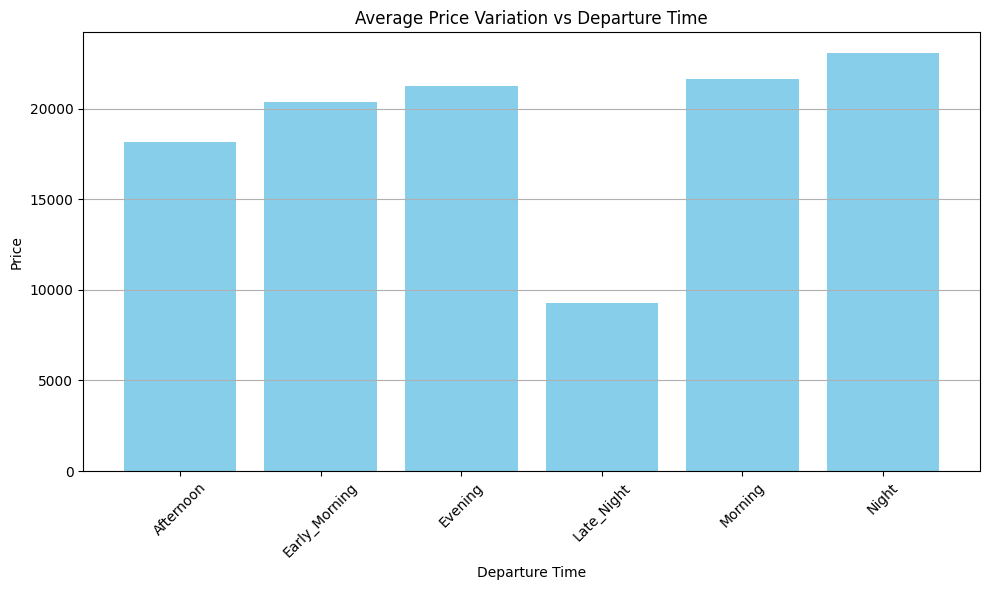

In [41]:
plt.figure(figsize=(10, 6))
plt.bar(grouped_dep['departure_time'], grouped_dep['price'], color='skyblue')
plt.xlabel('Departure Time')
plt.ylabel('Price')
plt.title('Average Price Variation vs Departure Time')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

As seen above the prices do change based on departure times. Prices are most high when flight depart at **Night** and relatively cheap at **Late Night**.

#### Do prices change based on Arrival time?

In [42]:
grouped_arr = df.groupby(['arrival_time'])['price'].mean().reset_index()
grouped_arr

,arrival_time,price
0,Afternoon,18494.598993
1,Early_Morning,14993.139521
2,Evening,23044.371615
3,Late_Night,11284.906078
4,Morning,22231.076098
5,Night,21586.758341


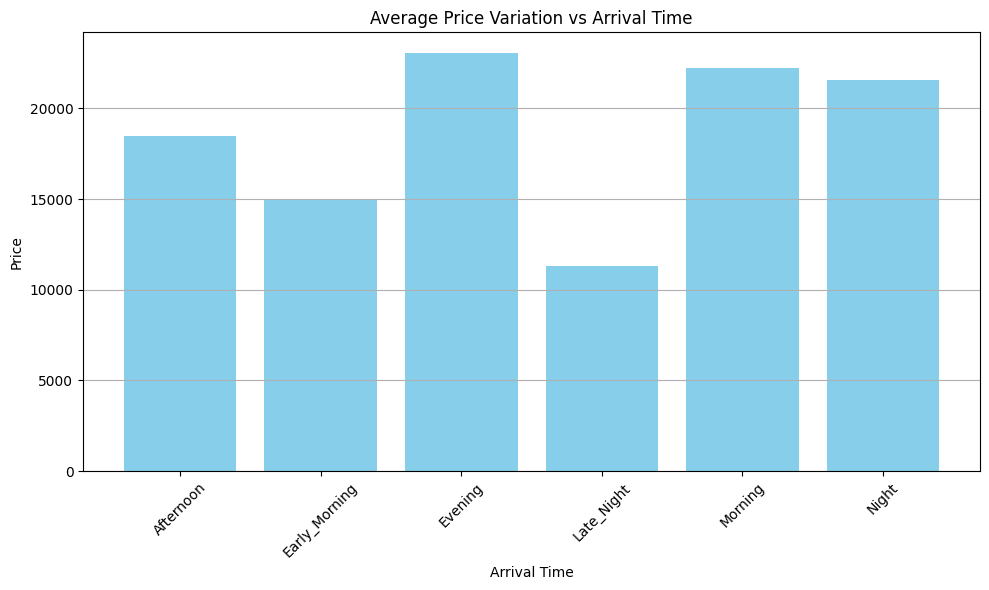

In [43]:
plt.figure(figsize=(10, 6))
plt.bar(grouped_arr['arrival_time'], grouped_arr['price'], color='skyblue')
plt.xlabel('Arrival Time')
plt.ylabel('Price')
plt.title('Average Price Variation vs Arrival Time')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

As seen in the above visual, arrival time do have an affect on prices with **Evening** arrival time being the most expensive and interestingly again **Late Night** arrival time have the cheapest rates on average.

#### Distribution of Prices

For a proper fitting of the model it is important that we have minimum outliers in the dataset as these contribute to noise in our dataset and could have a negative effect on our model's performance.

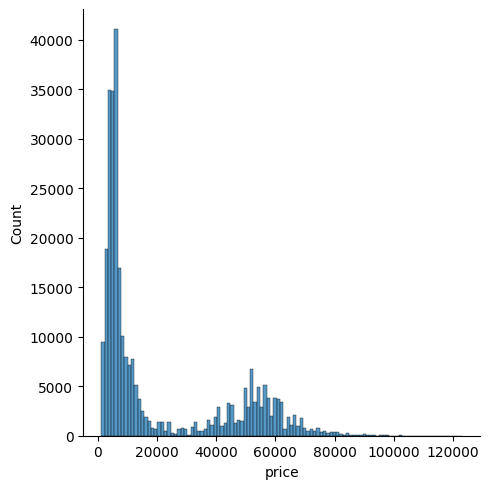

In [44]:
sns.displot(df,x="price")

To filter out the outliers we will be using standard scores also known as **Z-Score**. This score basically tells us how far the value is from the mean in a normal distribution, generally a Z-Score less than or greater than **3** is considered to be an outlier.

In [45]:
data = df['price']
z_scores = stats.zscore(data)
threshold = 3  # Example threshold
outliers = (z_scores > threshold) | (z_scores < -threshold)

print("Outliers:", [data[i] for i in range(len(data)) if outliers[i]])

Outliers: [95657, 91575, 90281, 90281, 90057, 90057, 93081, 93081, 114434, 116562, 93081, 90057, 90628, 91289, 93081, 93417, 100395, 89273, 91177, 91177, 91177, 91659, 92745, 93417, 99129, 101369, 117307, 89363, 91177, 91177, 91659, 93417, 93417, 97337, 105961, 89934, 89934, 102114, 102114, 102114, 102114, 102114, 110850, 89979, 91659, 110872, 91659, 91659, 91659, 91659, 102114, 102114, 102114, 91659, 91659, 89934, 89934, 91659, 91659, 91659, 91659, 95741, 95741, 96587, 114507, 104987, 93563, 104466, 104466, 100288, 100288, 89284, 100473, 100473, 92633, 103335, 92633, 92633, 99577, 92633, 92633, 92633, 90308, 111437, 88992, 88992, 90644, 90644, 90644, 92772, 92772, 92772, 99403, 101531, 102404, 102404, 105764, 105764, 105764, 111163, 114523, 89821, 90644, 90644, 90644, 90644, 92683, 92806, 95309, 95684, 95684, 95684, 99403, 100276, 101844, 101844, 101844, 105764, 91949, 91949, 95012, 93181, 95012, 95309, 96916, 95309, 89821, 89821, 95012, 100276, 102404, 95309, 89099, 92772, 93181, 958

In [46]:
filtered_df = df[(z_scores < threshold) & (z_scores > -threshold)]

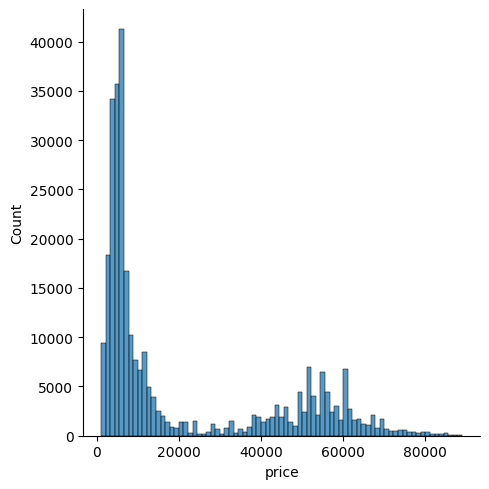

In [47]:
sns.displot(filtered_df,x="price")

In [48]:
df = filtered_df

### Correlation in the Data

Correlation coefficent measures the strength between strength of relationship between two variables. The idea is that as on variable changes the other variable changes in a direction of magnitude.

In context to this project as seen in the dataset we have categorical and numerical data, both of these can affect the flight prices so it is essential to calculate the correlation for all these columns with the target. 

We will be using two methods of calculating correlations:
1. Pearson's Correlatoin Coefficiant (For Continous Variables)
2. ANOVA (Analysis of Variance) (For Categorical Variables)

#### Pearson's Correlation

Measures the linear relationship between two continuous variables.
 
Let's say $x$ and $y$ are two continuous variables, the Pearson correlation coefficient between them can be found by the following formula.
 
 
$$r = \frac{ \sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}) }{%
        \sqrt{\sum_{i=1}^{n}(x_i-\bar{x})^2}\sqrt{\sum_{i=1}^{n}(y_i-\bar{y})^2}}$$
 
where $x_i$ and $y_i$ represents the $i^{th}$ value of the variables.
The value of $r$ ranges between $-1$ and $+1$.
 
Their strength of relationship is measured by the absolute value of coefficient, whereas the sign of the coefficient indicates the direction of the relationship.

In [49]:
df[['duration','days_left','price']].corr()

,duration,days_left,price
duration,1.000000,-0.038472,0.205167
days_left,-0.038472,1.000000,-0.087405
price,0.205167,-0.087405,1.000000


<Axes: >

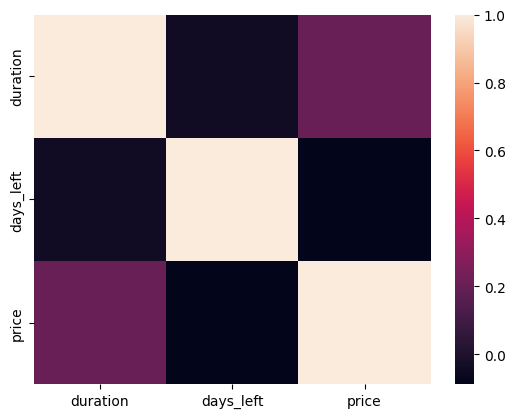

In [50]:
sns.heatmap(df[['duration','days_left','price']].corr())

#### ANOVA


ANOVA is a statistical method used to measure the differences between the means of three or more groups. It helps to determine whether there are any statistically significant differences between the means of independent (unrelated) groups.

Let's say we have a categorical variable with \( $k$ \) groups and a continuous variable, the ANOVA test can be used to find out if the means of the groups are significantly different from each other.

The ANOVA test involves the following components:

- **Between-group variability**: Variability due to the interaction between the different groups (i.e., the variation of group means around the overall mean).
- **Within-group variability**: Variability within each group (i.e., the variation of observations within each group around their group mean).

The test statistic for ANOVA is the F-statistic, which is calculated as:

\$$[ F = \frac{\text{Between-group variability}}{\text{Within-group variability}} \]$$

### Formula for ANOVA

1. **Calculate the overall mean**$$\bar{X}: [ \bar{X} = \frac{1}{N} \sum_{i=1}^{N} X_i ]$$

2. **Calculate the group means** $$\bar{X}_j for each group j: \bar{X}_j = \frac{1}{n_j} \sum_{i=1}^{n_j} X_{ij} $$

3. **Calculate the Sum of Squares Between groups (SSB)**:$${SSB} = \sum_{j=1}^{k} n_j (\bar{X}_j - \bar{X})^2$$

4. **Calculate the Sum of Squares Within groups (SSW)**:$${SSW} = \sum_{j=1}^{k} \sum_{i=1}^{n_j} (X_{ij} - \bar{X}_j)^2 $$

5. **Calculate the Mean Squares Between groups (MSB)**:$${MSB} = \frac{\text{SSB}}{k - 1}$$

6. **Calculate the Mean Squares Within groups (MSW)**:$${MSW} = \frac{\text{SSW}}{N - k}$$

7. **Calculate the F-statistic**:$$F = \frac{\text{MSB}}{\text{MSW}}$$

Where:
- \( $X_i$ \) represents the \($i^{th}$\) value of the variable.
- \( $N$ \) is the total number of observations.
- \( $n_j$ \) is the number of observations in group \($j$\).
- \( $k$ \) is the number of groups.

### Interpretation of the F-statistic
- If the F-statistic is significantly larger than 1, it suggests that there are significant differences between the group means.
- The p-value associated with the F-statistic helps to determine the statistical significance. A p-value less than the chosen significance level (commonly 0.05) indicates that at least one group mean is different from the others.


In [51]:
def perform_anova(df, categorical_column, target_column):
    unique_values = df[categorical_column].unique()
    groups = [df[target_column][df[categorical_column] == value] for value in unique_values]
    f_value, p_value = f_oneway(*groups)
    return f_value, p_value
categorical_columns = ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']
target_column = 'price'

In [52]:
anova_results = {}
for column in categorical_columns:
    f_value, p_value = perform_anova(df, column, target_column)
    anova_results[column] = {'F-value': f_value, 'p-value': p_value}

# Display the results
anova_results

{'airline': {'F-value': 17130.180496074812, 'p-value': 0.0},
 'flight': {'F-value': 72.51195172933227, 'p-value': 0.0},
 'source_city': {'F-value': 137.18994594029272,
  'p-value': 7.904374417024508e-146},
 'departure_time': {'F-value': 312.4417038813123, 'p-value': 0.0},
 'stops': {'F-value': 6522.222258290713, 'p-value': 0.0},
 'arrival_time': {'F-value': 1000.8809300317026, 'p-value': 0.0},
 'destination_city': {'F-value': 189.09508013234614,
  'p-value': 8.009073739057693e-202},
 'class': {'F-value': 2288045.5418366618, 'p-value': 0.0}}

C:\Users\syed.mubashir\AppData\Local\Temp\ipykernel_17080\1225930027.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


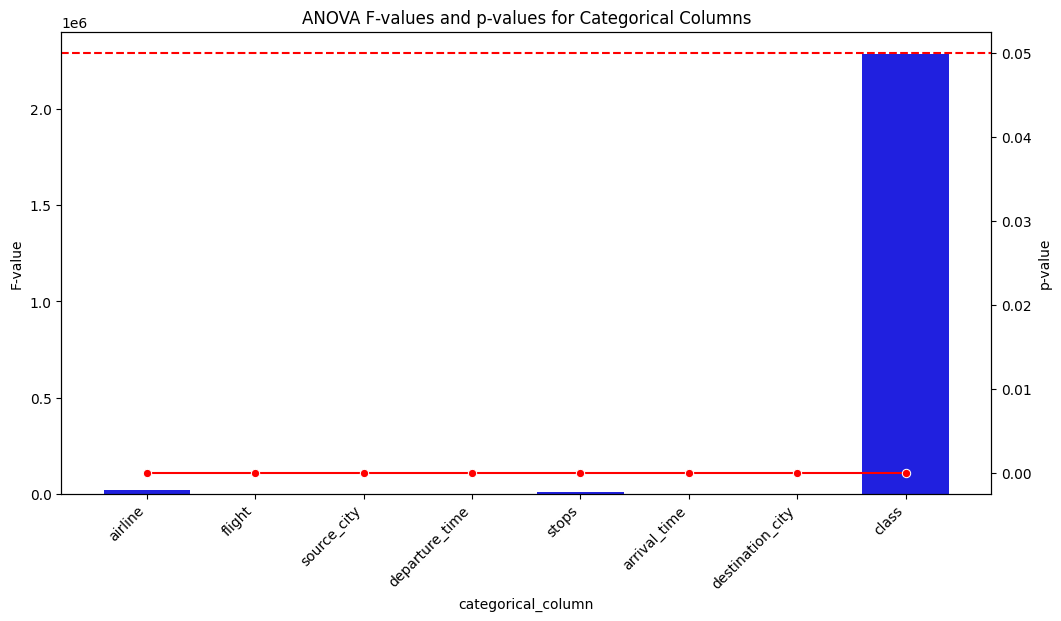

In [53]:
anova_df = pd.DataFrame(anova_results).T.reset_index().rename(columns={'index': 'categorical_column'})

# Visualize the results
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot F-values
sns.barplot(x='categorical_column', y='F-value', data=anova_df, ax=ax1, color='b')
ax1.set_ylabel('F-value')
ax1.set_title('ANOVA F-values and p-values for Categorical Columns')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Create a secondary y-axis to plot p-values
ax2 = ax1.twinx()
sns.lineplot(x='categorical_column', y='p-value', data=anova_df, ax=ax2, color='r', marker='o')
ax2.set_ylabel('p-value')
ax2.axhline(y=0.05, color='r', linestyle='--')  # Add a threshold line for significance

plt.show()

According to the calculations and visualtions above it seems that the numerical variables dont really have an effect on the price of the flights, rather the categorical variables have significants relationships with the target variable, it seems that the **airline**, **stops** and especially **class** have the strongest effect on the price. Therefore these will be our predictor variables for the Linear Regression Model.

In [ ]:
sns.swarmplot(data=df, x='class', y='price')

## Train - Test Split

We are going to splitting our data in **75-25 Split** where 75% of the dataset is going to be used for testing and 25% for testing the model.

In [54]:
train_df, test_df = train_test_split(df, test_size=0.25, random_state=42)

## Feature Engineering

In this context Linear Regression does not work explicitly for categorical variables so we would need to get some numeric representation to process the data for our model.

In [55]:
# Convert categorical variables to dummy variables for training and testing sets
train_df = pd.get_dummies(train_df, columns=['airline', 'stops', 'class'], dtype=int,drop_first=True)
test_df = pd.get_dummies(test_df, columns=['airline', 'stops', 'class'], dtype=int,drop_first=True)

# Features and target for training set
X_train = train_df.drop(['price','Unnamed: 0','flight', 'source_city','departure_time','arrival_time','destination_city','duration','days_left'],axis=1)
y_train = train_df['price']

# Features and target for testing set
X_test = test_df.drop(['price','Unnamed: 0','flight', 'source_city','departure_time','arrival_time','destination_city','duration','days_left'],axis=1)
y_test = test_df['price']


## Linear Regression 

Now that we have defined our training and testing datasets we can proceed to fit our model.

### StatsModel

In [56]:
model = sm.OLS(y_train, X_train).fit()

### Scikit Learn

In [57]:
model_scikit = LinearRegression().fit(X_train,y_train)

## Model Summaries

In [58]:
# Printing the parameters
model.params
model.summary()

#force intercept term
x_train_with_intercept = sm.add_constant(X_train)
model = sm.OLS(y_train, x_train_with_intercept).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 2.680e+05
Date:                Tue, 09 Jul 2024   Prob (F-statistic):               0.00
Time:                        14:56:02   Log-Likelihood:            -2.3056e+06
No. Observations:              224663   AIC:                         4.611e+06
Df Residuals:                  224654   BIC:                         4.611e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4.974e+04     73.02

In [66]:
print("Coefficients:", model_scikit.coef_)
print("Intercept:", model_scikit.intercept_)

y_pred = model_scikit.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared
r2 = model_scikit.score(X_test, y_test)
print("R-squared:", r2)

n = len(y_test)
k = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
print("Adjusted R-squared:", adjusted_r2)

Coefficients: [   858.51568471   1765.43583237   2472.11833952   3452.55114569
   4553.50860622   2627.3069178   -8321.89276922 -44735.15193928]
Intercept: 49737.50253546167
Mean Squared Error: 47031038.379194304
R-squared: 0.9063494893825921
Adjusted R-squared: 0.9063394838525377


### Comparision of the Models

As seen in the summary above both models performed relatively the same with **Scikit Learns** model having a slight edge but in the grand scheme of thing the approximate difference is negligible. Both models have approximately the same $R^2$ and Adjusted $R^2$. Which rounds off to **0.91**.